In [1]:
import matplotlib.pyplot as plt
import numpy as np
import spatial_profiles as prf
import models
import potential_sweeps
import plotting

%matplotlib widget

In [2]:
ion_concentration_molar = 0.15
x = prf.get_x_axis_nm(xmax_nm=100, n_points=1000)
# x = np.linspace(0, 100, 1000)
xmin = -0.05
xmax = 10
print(3.1*3.33e-30)

1.0323e-29


3.0851447590849953e-10
1.583621949166307e-29
Solved in 2 iterations, number of nodes 1127. 
Maximum relative residual: 8.74e-07 
Maximum boundary residual: 2.91e-59
ODE problem solved and saved under ./solutions/GongadzeIglic 2-5\sol_GongadzeIglic 2-5_c0_0.1500M__xmax_100nm__bc_Dirichlet0.20.pkl.


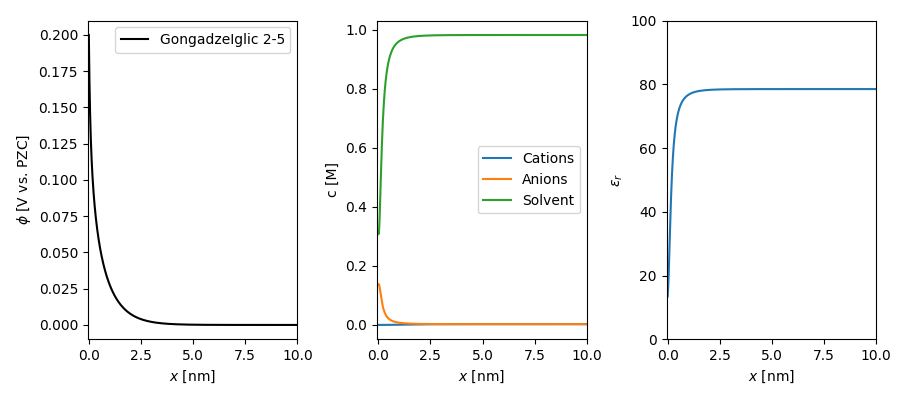

In [3]:
gi = models.GongadzeIglic(ion_concentration_molar, 2, 5)
gi_sol, gi_res = gi.solve_dirichlet(x, 0.20)
fig, ax = plotting.plot_solution(gi_sol, xmin, xmax, logscale=False)

# bo = models.Borukhov(ion_concentration_molar, 1/gi.n_max**(1/3))
# bo_sol, bo_res = bo.solve_dirichlet(x, -0.5)
# fig, ax = plotting.plot_solution(bo_sol, xmin, xmax, logscale=False)
plt.show()

In [4]:
# Solvent boltzmann factor is probably larger than counterion boltzmann factor near the surface
# How to achieve Borukhov-like saturation at the surface? Is that even what we want?

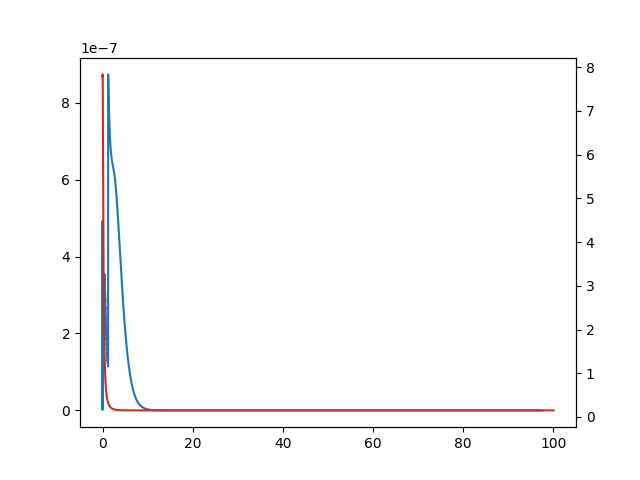

In [5]:
fig, ax = plt.subplots()
ax.plot(gi_sol.x[:-1], gi_res)
ax2 = ax.twinx()
ax2.plot(gi_sol.x, gi_sol.c_dict['Anions'], color='tab:red')

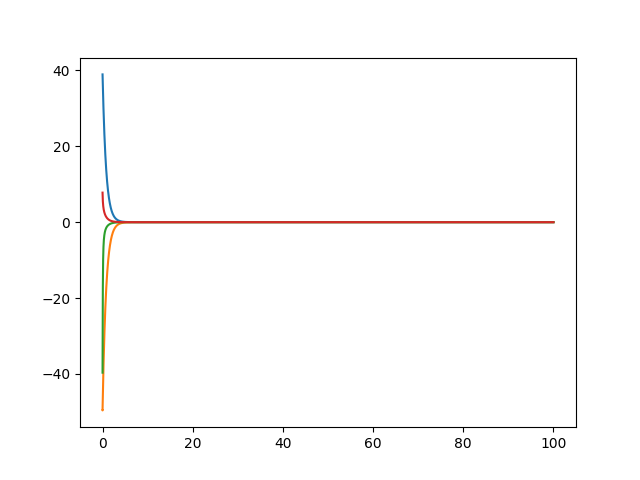

In [6]:
import constants as C 

y_initial=np.zeros((2, x.shape[0]))
y_initial[0, :] = C.BETA * C.Z * C.E_0 * 1 * np.exp(-x*1e-9*gi.kappa_debye)
y_initial[1, :] = np.gradient(y_initial[0, :], x)

fig, ax = plt.subplots()
ax.plot(x, y_initial.T)
ax.plot(gi_sol.x, - gi_sol.efield * C.BETA * C.Z * C.E_0 / gi.kappa_debye)
ax.plot(gi_sol.x, C.BETA * C.Z * C.E_0 * gi_sol.phi)

In [7]:
potential = np.linspace(-0.3, 0.3, 100)
gi_sweep = potential_sweeps.numerical(gi, potential, force_recalculation=True)
bo_sweep = potential_sweeps.borukhov(ion_concentration_molar, 1/gi.n_max**(1/3), potential)

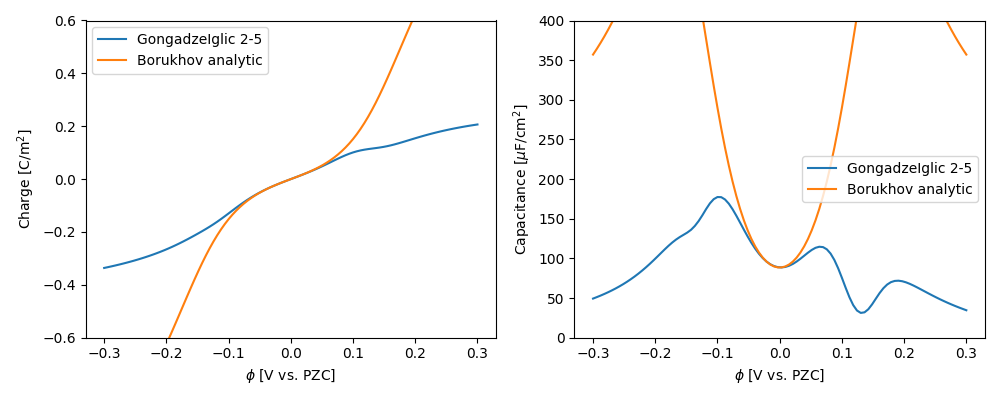

In [8]:
fig, ax = plotting.plot_potential_sweep([gi_sweep, bo_sweep])